#Business Understanding

Counter-Strike es un juego de disparos en primera persona donde dos equipos, terroristas y contra-terroristas, se enfrentan. Los terroristas intentan plantar una bomba, mientras que los contra-terroristas tratan de evitarlo. El juego se desarrolla en diversos mapas y requiere habilidad en el disparo, estrategia y trabajo en equipo. Counter-Strike es altamente competitivo y ha ganado popularidad tanto en la comunidad de jugadores como en los esports.

Como objetivo nos planteamos analizar cuales columnas de nuestro dataset nos permiten realzar una prediccion sobre la cantidad de muertes que obtendra un jugador a partir de distintas variables.

#Data Understanding

##Luego de haber trazado nuestro objetivo y que es lo que queremos lograr con nuestros datos pasaremos a realizar un entendimiento de estos, ejecutando codigos en python para tener una vision mas global de nuestra data

In [1]:
#Definimos que tipo de dato es cada columna si es categórico o numerico

#      """Datos                                  Tipo de dato\n" \
#        "Map                                   Variable categórica nominal (nombre del mapa donde se jugó la partida)\n" \
#        "Team                                  Variable categórica nominal (nombre del equipo al que pertenece el jugador)\n" \
#        "InternalTeamId:                       Dato numérico discreto (identificador del equipo al que pertenece el jugador)\n" \
#        "RoundID                               numerico discreto\n" \
#        "MatchWinner                           categorico nominal\n" \
#        "RoundWinner                           categorico nominal\n" \
#        "InternalTeamId                        Dato numérico discreto (identificador del equipo al que pertenece el jugador)\n" \
#        "RoundId                               Dato numérico discreto (identificador de la ronda)\n" \
#        "RoundWinner                           Variable categórica nominal (indica si el jugador ganó o no la ronda analizada)                             \n" \
#        "MatchWinner                           Variable categórica nominal (indica si el jugador ganó o no la partida\n" \
#        "Survived                              Variable categórica nominal (indica si el jugador sobrevivió o no a la partida)\n" \
#        "AbnormalMatch                         Variable categórica nominal (indica si la partida del jugador tuvo un error por conexión de red)                           \n" \
#        "TimeAlive                             Dato numérico continuo (indica el tiempo en segundos que el jugador estuvo vivo durante el juego)                 \n" \
#        "TravelledDistance                     Dato numérico continuo (distancia viajada por el jugador durante la partida).                   \n" \
#        "RLethalGrenadesThrown                 Dato numérico discreto (cantidad de granadas letales lanzadas)               \n" \
#        "RNonLethalGrenadesThrown              Dato numérico discreto (cantidad de granadas no-letales lanzadas)                 \n" \
#        "PrimaryAssaultRifle                   Dato numérico continuo (porcentaje de uso de arma clasificada como primaria, en la categoría de Rifle de Asalto           \n" \
#        "PrimarySniperRifle                    Dato numérico continuo (porcentaje de uso de arma clasificada como primaria, en la categoría de Rifle de Francotirador)           \n"
#        "PrimaryHeavy:                         Dato numérico continuo (porcentaje de uso de arma clasificada como primaria, en la categoría de Arma Pesada)           \n"
#        "PrimarySMG:                           Dato numérico continuo (porcentaje de uso de arma clasificada como primaria, en la categoría de Subfusil)           \n"
#        "PrimaryPistol:                        Dato numérico continuo (porcentaje de uso de arma clasificada como primaria, en la categoría de Pistola)            \n"
#        "FirstKillTime:                        Dato numérico continuo (tiempo del primer asesinato durante la partida)            \n"
#        "RoundKills:                           Dato numérico discreto (cantidad de kills efectuados por el jugador durante la ronda)           \n"
#        "RoundAssists:                         Dato numérico discreto (cantidad de asistencias efectuadas por el jugador durante la ronda)          \n"
#        "RoundHeadshots:                       Dato numérico discreto (cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la ronda).           \n"
#        "RoundFlankKills:                      Dato numérico discreto (cantidad de kills efectuados por el jugador sin que la víctima lo viera durante la ronda)         \n"
#        "TeamStartingEquipmentValue:           Dato numérico discreto (valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda)          \n"
#        "MatchKills:                           Dato numérico discreto (cantidad total de kills efectuados por el jugador durante la partida)       \n"
#        "MatchFlankKills:                      Dato numérico discreto (cantidad total de kills efectuados por el jugador sin que la víctima lo viera durante la partida)          \n"
#        "MatchAssists:                         Dato numérico discreto (cantidad total de asistencias efectuadas por el jugador durante la partida)           \n"
#        "MatchHeadshots:                       Dato numérico discreto (cantidad total de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida)           \n"""

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
filename = '/content/Anexo ET_demo_round_traces_2022.csv'

In [4]:
# Definimos una variable df como nombre de nuestro dataframe
df = pd.read_csv(filename, sep=";")

<ipython-input-4-11bf693058d3>:2: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, sep=";")


In [5]:
df

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79152,123775,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,...,0,0,0,0,5600,27100,4,0,2,2
79153,123776,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,...,1,0,1,0,5500,27100,8,5,1,3
79154,123777,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,...,0,0,0,0,4950,27100,5,0,2,3
79155,123778,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,...,0,0,0,0,4950,27100,1,0,1,0


In [6]:
df.shape #Cantidad de columnas y filas de nuestro dataset

(79157, 30)

In [7]:
# Podemos verificar que debemos cambiar el tipo de dato (int64, object, float64) de varias columnas, para trabajar con datos estandarizados
# y no dejas ninguno como object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157 non-null  object 
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

In [8]:
df['MatchWinner'].unique()

array([True, False, nan], dtype=object)

<Axes: xlabel='RoundStartingEquipmentValue', ylabel='Count'>

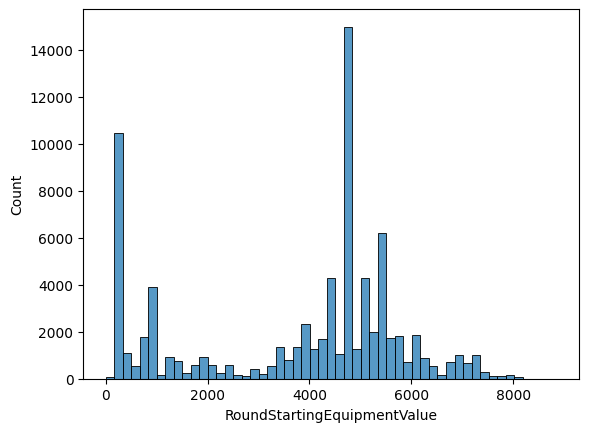

In [9]:
# para conocer la forma de algunos datos realizaremos un grafico sobre nuestra variable RoundStartingEquipmentValue
sns.histplot(data=df, x="RoundStartingEquipmentValue")

<ipython-input-10-9decd6d5b678>:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(df['RoundStartingEquipmentValue'], bw=0.5)


<Axes: xlabel='RoundStartingEquipmentValue', ylabel='Density'>

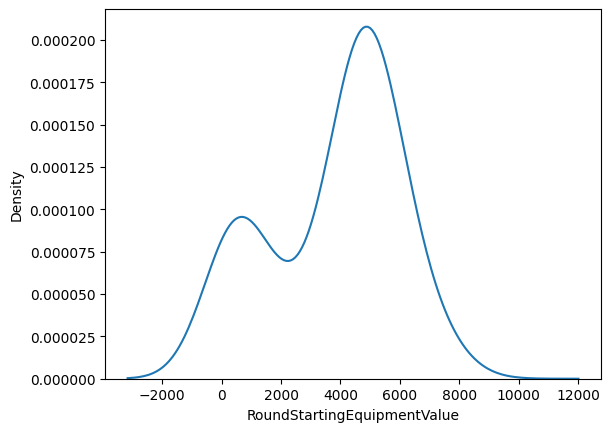

In [10]:
# distribucion en formato de campana de gauss
sns.kdeplot(df['RoundStartingEquipmentValue'], bw=0.5)

<ipython-input-11-96cd8b824a08>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['RoundStartingEquipmentValue'])


<Axes: xlabel='RoundStartingEquipmentValue', ylabel='Density'>

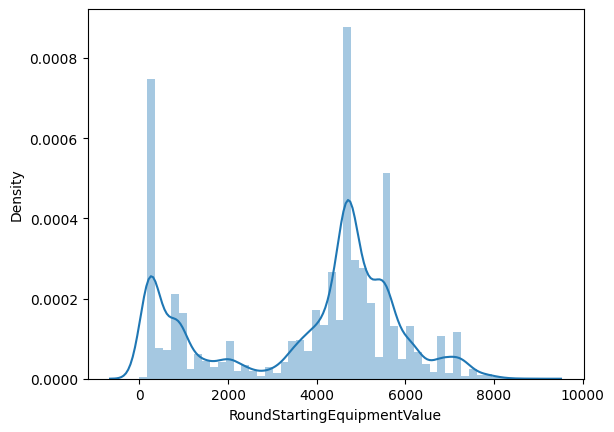

In [11]:
# Ambos graficos comhinados en uno solo para visualizar mayor información
sns.distplot(df['RoundStartingEquipmentValue'])

<Axes: xlabel='Map', ylabel='count'>

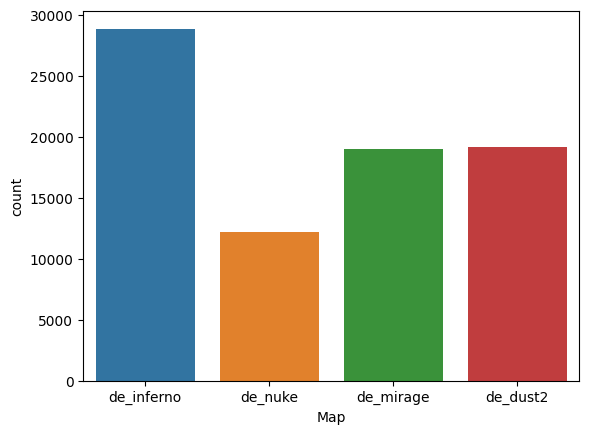

In [12]:
# Cantidad de jugadores que han jugado una partida en nuestro dataset
sns.countplot(x='Map', data=df)


In [13]:
df.shape

(79157, 30)

In [14]:
df = df.rename(columns={'Unnamed: 0': 'idPlayer'})

In [15]:
df

,idPlayer,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79152,123775,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,...,0,0,0,0,5600,27100,4,0,2,2
79153,123776,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,...,1,0,1,0,5500,27100,8,5,1,3
79154,123777,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,...,0,0,0,0,4950,27100,5,0,2,3
79155,123778,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,...,0,0,0,0,4950,27100,1,0,1,0


#Data Preparation

In [16]:
#Importamos librerias a utilizar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [17]:
#Eliminamos columnas que no aportaran a nuestro modelo de datos
df = df.drop('idPlayer', axis=1)
df = df.drop('RLethalGrenadesThrown', axis=1)
df = df.drop('RNonLethalGrenadesThrown', axis=1)
df = df.drop('InternalTeamId', axis=1)
df = df.drop('MatchId', axis=1)
df = df.drop('RoundId', axis=1)
#df = df.drop('TravelledDistance', axis=1)

In [18]:
#Verificamos si existen nulos
df.isnull().sum()

Map                            0
Team                           2
RoundWinner                    0
MatchWinner                    1
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
TravelledDistance              0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int64

In [19]:
#le asignaremos a los NaN de la columna Team la moda de ella
moda_team = df['Team'].mode()[0]# en este caso el resultado fue "Terrorist"
moda_match_winner = df['MatchWinner'].mode()[0]
df['Team'].fillna(moda_team, inplace=True)
df['MatchWinner'].fillna(moda_team, inplace=True)

In [20]:
# Transformamos nuestras variables categoricas a nuevas columnas binarias
one_hot_map = pd.get_dummies(df['Map'], dtype=int, prefix='encoding MAP')
one_hot_team = pd.get_dummies(df['Team'], dtype=int, prefix='encoding Team' )
one_hot_Survived = pd.get_dummies(df['Survived'], dtype=int, prefix='encoding Survived')
one_hot_RoundWinner = pd.get_dummies(df['RoundWinner'], dtype=int, prefix='encoding RoundWinner')

In [21]:
# Revisamos si existen outlier en nuestro dataset
outlier_rows = df[df['MatchWinner'] == 'Terrorist']
df = df.drop(29)

In [22]:
one_hot_MatchWinner = pd.get_dummies(df['MatchWinner'], dtype=int)

In [23]:
#Cambiamos el tipo de dato de nuestras columnas tipo object a category
df['Map'] = df['Map'].astype('category')
df['Team'] = df['Team'].astype('category')

In [24]:
#Buscar True en columna RoundWinner en formato object y pasarlo a booleano

df[['RoundWinner']] = df[['RoundWinner']].replace('True', True)

#Buscar False en en columna RoundWinner en formato object y pasarlo a booleano

df[['RoundWinner']] = df[['RoundWinner']].replace('False', False)

#Pasar columna completa RoundWinner a booleano

df[['RoundWinner']] = df[['RoundWinner']].astype(bool)

#Buscar True en columna MatchWinner en formato object y pasarlo a booleano

df[['MatchWinner']] = df[['MatchWinner']].replace('True', True)

#Buscar False en en columna RoundWinner en formato object y pasarlo a booleano

df[['MatchWinner']] = df[['MatchWinner']].replace('False', False)

#Pasar columna completa RoundWinner a booleano

df[['MatchWinner']] = df[['MatchWinner']].astype(bool)

In [25]:
# Eliminamos fila con nulos
df.drop(37219)

,Map,Team,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,PrimaryAssaultRifle,PrimarySniperRifle,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,de_inferno,Terrorist,False,True,False,False,51.120.248.995.704.500,10.083.140.737.457.000,0.0,0.0,...,0,0,0,0,750,4400,0,0,0,0
1,de_inferno,Terrorist,False,True,False,False,4.348.662.552.266.170,60.960.883.184.688.400,0.0,0.0,...,0,0,0,0,800,4400,0,0,0,0
2,de_inferno,Terrorist,False,True,False,False,3.735.469.847.054.540,5.642.252.383.582.750,0.0,0.0,...,0,0,0,0,1000,4400,0,0,0,0
3,de_inferno,Terrorist,False,True,False,False,4.767.886.136.441.470,8.963.473.313.229.970,0.0,0.0,...,0,0,0,0,850,4400,0,0,0,0
4,de_inferno,Terrorist,False,True,True,False,5.312.251.089.027.310,10.865.649.734.393.100,0.0,0.0,...,0,0,0,0,1000,4400,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79152,de_mirage,CounterTerrorist,False,False,False,False,340.272.074.099.723,4.048.177.852.924.460,1.0,0.0,...,0,0,0,0,5600,27100,4,0,2,2
79153,de_mirage,CounterTerrorist,False,False,False,False,2.926.105.436.288.080,3.213.477.612.567.870,1.0,0.0,...,1,0,1,0,5500,27100,8,5,1,3
79154,de_mirage,CounterTerrorist,False,False,False,False,5.914.717.797.783.930,6.005.168.938.274.500,1.0,0.0,...,0,0,0,0,4950,27100,5,0,2,3
79155,de_mirage,CounterTerrorist,False,False,False,False,42.582.842.797.783.900,27.987.628.542.398.100,0.0,1.0,...,0,0,0,0,4950,27100,1,0,1,0


In [26]:
# Modificamos la columna para manejar de menor manera el tiempo
df['FirstKillTime'] = df['FirstKillTime'].str.replace('.', '')
df['FirstKillTime'] = df['FirstKillTime'].astype('int64')
df[['FirstKillTime']]

<ipython-input-26-eb228a0e59c1>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['FirstKillTime'] = df['FirstKillTime'].str.replace('.', '')


,FirstKillTime
0,0
1,0
2,0
3,0
4,0
...,...
79152,2277596
79153,28714119
79154,297689228
79155,7528178


In [27]:
df.describe()

,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
count,79156.000000,79156.000000,79156.000000,79156.000000,79156.000000,7.915600e+04,79156.000000,79156.000000,79156.000000,79156.000000,79156.000000,79156.000000,79156.000000,79156.000000,79156.000000,79156.000000
mean,0.675359,0.089841,0.005964,0.007046,0.221790,7.151850e+15,0.671358,0.146180,0.301556,0.095634,3778.102734,18890.083506,8.511661,1.209927,1.874842,3.858507
std,0.464127,0.279798,0.075497,0.082453,0.415453,1.536662e+16,0.881800,0.385603,0.578846,0.320642,2111.298076,9743.254403,6.195075,1.435153,1.824036,3.246765
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,6.613371e+06,0.000000,0.000000,0.000000,0.000000,1600.000000,10900.000000,3.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,2.162510e+08,0.000000,0.000000,0.000000,0.000000,4700.000000,22550.000000,8.000000,1.000000,1.000000,3.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,5.814694e+15,1.000000,0.000000,0.000000,0.000000,5200.000000,26050.000000,13.000000,2.000000,3.000000,6.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,6.395996e+16,5.000000,4.000000,5.000000,5.000000,8850.000000,36150.000000,41.000000,11.000000,14.000000,22.000000


In [28]:
nan_values = df.isna().sum().sum()
nan_values

0

In [29]:
#Preparando columna TimeAlive

#Quitando puntos
df['TimeAlive'] = df['TimeAlive'].str.replace('.', '').astype('int64')

#Transformando columna a tipo int64
df[['TimeAlive']] = df[['TimeAlive']].astype('int64')

#Comprobando
df[['TimeAlive']]

<ipython-input-29-54bccd658cc8>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['TimeAlive'] = df['TimeAlive'].str.replace('.', '').astype('int64')


,TimeAlive
0,51120248995704500
1,4348662552266170
2,3735469847054540
3,4767886136441470
4,5312251089027310
...,...
79152,340272074099723
79153,2926105436288080
79154,5914717797783930
79155,42582842797783900


In [30]:
df[['TravelledDistance']]

,TravelledDistance
0,10.083.140.737.457.000
1,60.960.883.184.688.400
2,5.642.252.383.582.750
3,8.963.473.313.229.970
4,10.865.649.734.393.100
...,...
79152,4.048.177.852.924.460
79153,3.213.477.612.567.870
79154,6.005.168.938.274.500
79155,27.987.628.542.398.100


In [31]:
#Preparando columna TravelledDistance

#Hay valores exponenciales en formato texto, buscaremos la moda de la columna y lo reemplazaremos por ese dato
modaTravelledDistance= df['TravelledDistance'].mode()[0]
modaTravelledDistance
df[['TravelledDistance']] = df[['TravelledDistance']].replace('1,16E+06', modaTravelledDistance)
df[['TravelledDistance']] = df[['TravelledDistance']].replace('6,73E+07', modaTravelledDistance)

#Ya eliminados todos los datos literales , ahora quitamos puntos
df['TravelledDistance'] = df['TravelledDistance'].str.replace('.', '').astype('int64')

#Transformando columna a tipo int64
df[['TravelledDistance']] = df[['TravelledDistance']].astype('int64')

#Comprobando
df[['TravelledDistance']]

<ipython-input-31-e5e5469f6491>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['TravelledDistance'] = df['TravelledDistance'].str.replace('.', '').astype('int64')


,TravelledDistance
0,10083140737457000
1,60960883184688400
2,5642252383582750
3,8963473313229970
4,10865649734393100
...,...
79152,4048177852924460
79153,3213477612567870
79154,6005168938274500
79155,27987628542398100


In [32]:
df_raw_corr = df[['TimeAlive', 'FirstKillTime', 'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills', 'TeamStartingEquipmentValue', 'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots']]


In [33]:
#Realizamos una correlacion para analizar la relacion que existe entre las variables
correlation_matrix = df_raw_corr.corr(method='pearson')
correlation_matrix

,TimeAlive,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
TimeAlive,1.000000,0.020644,-0.046417,-0.001844,-0.030044,-0.015256,-0.037852,-0.002301,-0.000239,-0.001573,-0.004093
FirstKillTime,0.020644,1.000000,0.035606,-0.002493,0.024949,0.012096,0.019883,0.046184,0.025260,0.026848,0.039427
RoundKills,-0.046417,0.035606,1.000000,-0.021486,0.679178,0.391404,0.168604,0.183394,0.115981,0.019535,0.152595
RoundAssists,-0.001844,-0.002493,-0.021486,1.000000,-0.017337,-0.000059,0.067013,0.003472,0.008080,0.227471,-0.000815
RoundHeadshots,-0.030044,0.024949,0.679178,-0.017337,1.000000,0.233417,0.047940,0.112013,0.063584,0.004589,0.213814
RoundFlankKills,-0.015256,0.012096,0.391404,-0.000059,0.233417,1.000000,0.076409,0.078887,0.248837,0.010767,0.062923
TeamStartingEquipmentValue,-0.037852,0.019883,0.168604,0.067013,0.047940,0.076409,1.000000,0.178533,0.122460,0.135535,0.132279
MatchKills,-0.002301,0.046184,0.183394,0.003472,0.112013,0.078887,0.178533,1.000000,0.641596,0.510014,0.831450
MatchFlankKills,-0.000239,0.025260,0.115981,0.008080,0.063584,0.248837,0.122460,0.641596,1.000000,0.337652,0.516177
MatchAssists,-0.001573,0.026848,0.019535,0.227471,0.004589,0.010767,0.135535,0.510014,0.337652,1.000000,0.415549


Podemos observar una correlación positiva  0.831450 entre "MatchKills" y MatchHeadshots", lo que sugiere que los jugadores que tienen un alto número de asesinatos en una partida también tienen un alto número de disparos a la cabeza en esa partida.

Podemos observar una correlación positiva de 0.679178 entre RoundKills y RoundHeadshots, lo que indica que los jugadores que tienen un alto número
de asesinatos en una ronda también tienen un alto número de disparos a la cabeza en esa ronda.

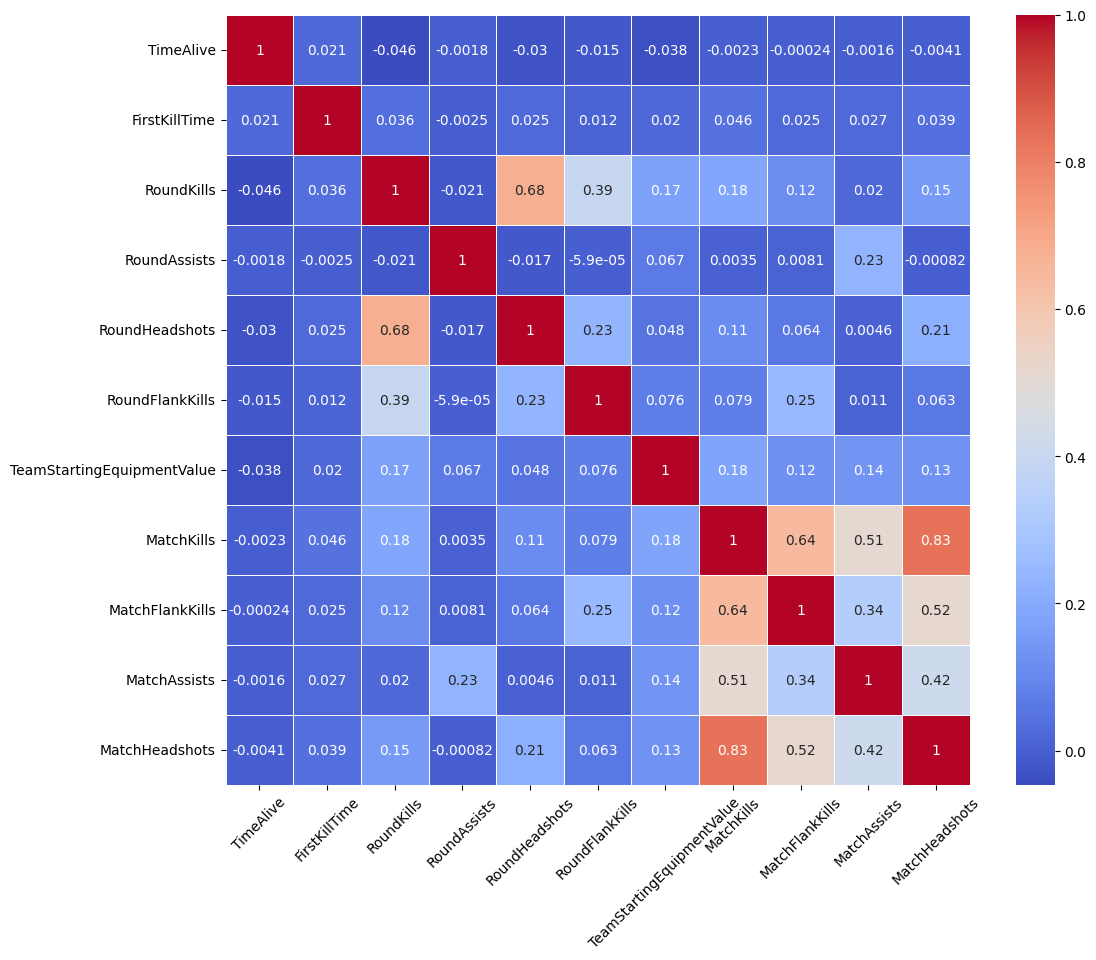

In [34]:
# Crear el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

# Ajustar las etiquetas de los ejes
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Mostrar el mapa de calor
plt.savefig('heatmap.png', dpi=300)
plt.show()

In [35]:
#Cantidad de derrotas y triunfos por equipo


resultados = df.groupby("Team")["RoundWinner"].value_counts().unstack().fillna(0)

nuevas_cabeceras = ['Derrotas', 'Triunfos']
resultados.columns = nuevas_cabeceras

print("Los resultados de las partidas jugadas son las siguientes: \n\n", resultados)

Los resultados de las partidas jugadas son las siguientes: 

                   Derrotas  Triunfos
Team                                
CounterTerrorist     22824     16739
Terrorist            16764     22829


In [36]:
#Cantidad de jugadores totales

cantidad_total_jugadores = df[['Map']].count()

print("La cantidad total de jugadores es: ", cantidad_total_jugadores)

La cantidad total de jugadores es:  Map    79156
dtype: int64


In [37]:
#Cantidad de jugadores por equipo

cant_jugadores_equipo = df['Team'].value_counts()
print("La cantidad de jugadores por equipo es: \n\n", cant_jugadores_equipo)

La cantidad de jugadores por equipo es: 

 Terrorist           39593
CounterTerrorist    39563
Name: Team, dtype: int64


In [38]:
#Promedio de tiempo de partida

promedio_partida = df['TimeAlive'].mean()
promedio_partida = promedio_partida.astype(int)
print ("El promedio de tiempo de una partida es: ", promedio_partida, "segundos")

El promedio de tiempo de una partida es:  12134142557537184 segundos


In [39]:
#Partida con mayor cantidad de headshots

max_RoundHeadshots = df[['RoundHeadshots']].max()
maximo_final = max_RoundHeadshots.values[0]

print("La partida con mayor cantidad de Headshots tuvo ", maximo_final, "Headshots")

La partida con mayor cantidad de Headshots tuvo  5 Headshots


In [40]:
# Crear objeto scaler
scaler = MinMaxScaler()

# Escalar las variables
datos_esc = scaler.fit_transform(df[['TimeAlive']])

# Ver los datos escalados
print(datos_esc)

[[0.79896767]
 [0.06796604]
 [0.05838234]
 ...
 [0.0924422 ]
 [0.66553499]
 [0.12510837]]


In [41]:
datos_esc_df = pd.DataFrame(datos_esc)

In [42]:
#Redondear columna datos_esc_df a entero con seis decimales

datos_esc_df = datos_esc_df.round(6)

In [43]:
#Concatenar columna datos_esc_df_raw al dataset

df = pd.concat([df, datos_esc_df], axis=1)

In [44]:
#Renombrar nueva columna concatenada a ScalatedTimeAlive

df.rename(columns={0: 'ScalatedTimeAlive'}, inplace=True)

In [45]:
#Obtener todas las cabeceras de columnas en un array para reorganizarlos

nombres_columnas = df.columns.to_numpy()

In [46]:
#Asignar todas las cabeceras al objeto nuevo_orden_columnas y especificar aquí el nuevo orden.
#En este caso, ScalatedTimeAlive irá inmediatamente después de TimeAlive (por defecto iba al final)

nuevo_orden_columnas = ['Map', 'Team', 'RoundWinner', 'MatchWinner', 'Survived',
       'AbnormalMatch', 'TimeAlive', 'ScalatedTimeAlive', 'TravelledDistance', 'PrimaryAssaultRifle',
       'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG',
       'PrimaryPistol', 'FirstKillTime', 'RoundKills', 'RoundAssists',
       'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue',
       'TeamStartingEquipmentValue', 'MatchKills', 'MatchFlankKills',
       'MatchAssists', 'MatchHeadshots']

In [47]:
#Reordenar las columnas de acuerdo al objeto nuevo_orden_columnas
df = df.reindex(columns=nuevo_orden_columnas)

In [48]:
#Eliminar fila 29 dado que solo tenía valores NaN
df = df.drop(29)

In [49]:
#En la columna ScalatedTimeAlive apareció un valor NaN. Obtendremos la moda de la columna y con ese dato reemplazaremos el valor NaN

modaScalatedTimeAlive = df['ScalatedTimeAlive'].mode()[0]
df['ScalatedTimeAlive'].fillna(modaScalatedTimeAlive, inplace=True)


In [50]:
# revisando el shape del dataframe
df.shape

(79156, 25)

In [51]:
df.isnull().sum()

Map                            0
Team                           0
RoundWinner                    0
MatchWinner                    0
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
ScalatedTimeAlive              0
TravelledDistance              0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int64

In [52]:
# revisando estadistica descriptiva
df.describe()

,TimeAlive,ScalatedTimeAlive,TravelledDistance,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
count,7.915600e+04,79156.000000,7.915600e+04,79156.000000,79156.000000,79156.000000,79156.000000,79156.000000,7.915600e+04,79156.000000,79156.000000,79156.000000,79156.000000,79156.000000,79156.000000,79156.000000,79156.000000,79156.000000,79156.000000
mean,1.213414e+16,0.189646,1.207967e+16,0.675359,0.089841,0.005964,0.007046,0.221790,7.151850e+15,0.671358,0.146180,0.301556,0.095634,3778.102734,18890.083506,8.511661,1.209927,1.874842,3.858507
std,1.435124e+16,0.224299,1.286535e+16,0.464127,0.279798,0.075497,0.082453,0.415453,1.536662e+16,0.881800,0.385603,0.578846,0.320642,2111.298076,9743.254403,6.195075,1.435153,1.824036,3.246765
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.419176e+15,0.069068,5.223994e+15,0.000000,0.000000,0.000000,0.000000,0.000000,6.613371e+06,0.000000,0.000000,0.000000,0.000000,1600.000000,10900.000000,3.000000,0.000000,0.000000,1.000000
50%,7.660043e+15,0.119720,8.771105e+15,1.000000,0.000000,0.000000,0.000000,0.000000,2.162510e+08,0.000000,0.000000,0.000000,0.000000,4700.000000,22550.000000,8.000000,1.000000,1.000000,3.000000
75%,1.080375e+16,0.168854,1.324127e+16,1.000000,0.000000,0.000000,0.000000,0.000000,5.814694e+15,1.000000,0.000000,0.000000,0.000000,5200.000000,26050.000000,13.000000,2.000000,3.000000,6.000000
max,6.398288e+16,1.000000,6.668497e+16,1.000000,1.000000,1.000000,1.000000,1.000000,6.395996e+16,5.000000,4.000000,5.000000,5.000000,8850.000000,36150.000000,41.000000,11.000000,14.000000,22.000000


In [53]:
# creando una funcion que se utilizara para crear un diagrama de caja
def plot_boxplot(df, ft):
  df.boxplot(column=[ft])
  plt.grid(False)
  plt.show()

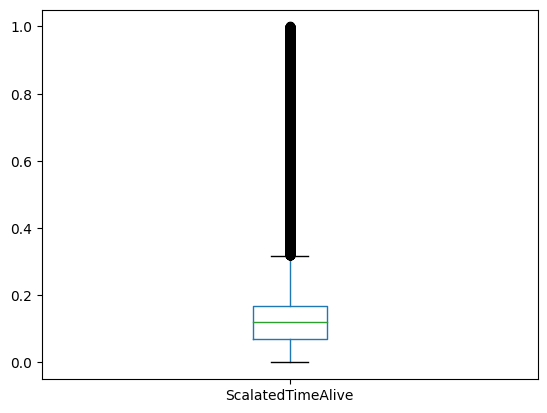

In [54]:
plot_boxplot(df, "ScalatedTimeAlive")

In [55]:
# función que se utiliza para detectar y devolver los valores atípicos (outliers)
def outliers (df, ft):
  Q1 = df[ft].quantile(0.25)
  Q3 = df[ft].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1  - 1.5 * IQR
  upper_bound = Q3  - 1.5 * IQR

  ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound)]

  return ls

In [56]:
# crear una lista vacía para almacenar los índices de salida de varias filas
index_list = []
for feature in ['ScalatedTimeAlive']:
  index_list.extend(outliers(df, feature))

In [57]:
# define una función llamada "remove" que devuelve un marco de datos limpio sin valores atípicos
def remove (df, ls):
  ls = sorted(set(ls))
  df = df.drop(ls)
  return df

In [58]:
df_cleaned = remove(df, index_list)

In [59]:
df_cleaned.shape

(9689, 25)

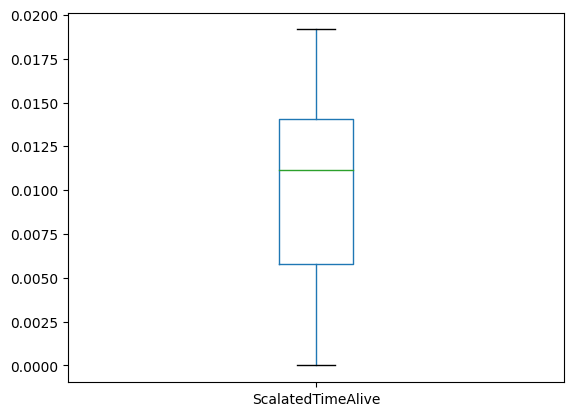

In [60]:
plot_boxplot(df_cleaned, 'ScalatedTimeAlive')

In [61]:
df['ScalatedTimeAlive'].unique()

array([0.798968, 0.067966, 0.058382, ..., 0.092442, 0.665535, 0.125108])

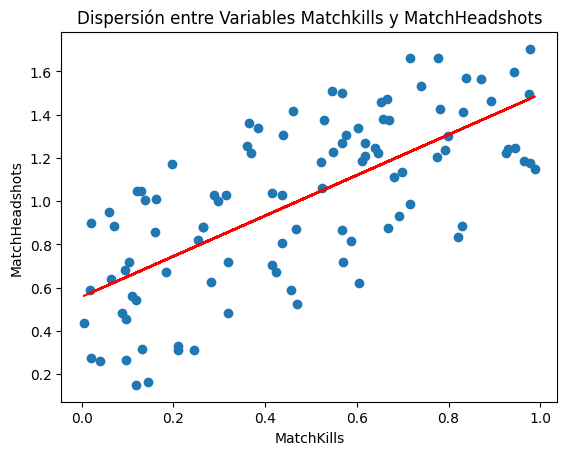

In [62]:
# Generar datos de ejemplo con correlación positiva
np.random.seed(0)
x = np.random.rand(100)
y = x + np.random.rand(100)

# Ajustar una línea de tendencia
coeficients = np.polyfit(x, y, 1)
line = np.poly1d(coeficients)

# Crear el gráfico de dispersión
plt.scatter(x, y)

# Agregar la línea de tendencia
plt.plot(x, line(x), color='red')

# Agregar etiquetas y título
plt.xlabel('MatchKills')
plt.ylabel('MatchHeadshots')
plt.title('Dispersión entre Variables Matchkills y MatchHeadshots')

# Mostrar el gráfico
plt.show()

In [63]:
df = pd.concat([df, one_hot_map, one_hot_team, one_hot_Survived, one_hot_MatchWinner, one_hot_RoundWinner], axis=1)

<ipython-input-63-835cff9429d5>:1: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, one_hot_map, one_hot_team, one_hot_Survived, one_hot_MatchWinner, one_hot_RoundWinner], axis=1)


In [64]:
#Se elimina columna TimeAlive Debido a que no se utilizara ya que se creo otra columna con sus datos escalados la cual se llama ScalatedTimeAlive
#df = df.drop('TimeAlive', axis=1)
df = df.drop('encoding RoundWinner_False4', axis=1)

#Modelling | Regression

In [65]:
#Cargamos librerias para cargar nuestro dataset y extraer mayor informacion
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [66]:
pd.set_option('display.max_columns', None)

In [67]:
columnas_para_modeling  = ['MatchFlankKills','MatchAssists','MatchHeadshots',	'MatchKills']

In [68]:
df_modeling = df_cleaned[columnas_para_modeling]

In [69]:
df_modeling

,MatchFlankKills,MatchAssists,MatchHeadshots,MatchKills
31,0.0,0.0,0.0,0.0
37,0.0,1.0,1.0,2.0
52,0.0,0.0,1.0,2.0
56,0.0,3.0,2.0,4.0
58,1.0,0.0,4.0,10.0
...,...,...,...,...
79084,1.0,3.0,5.0,12.0
79129,2.0,1.0,2.0,4.0
79136,1.0,1.0,0.0,1.0
79151,0.0,0.0,1.0,2.0


In [70]:
X = df_modeling[['MatchFlankKills','MatchAssists','MatchHeadshots']].to_numpy()
y = df_modeling[['MatchKills']].to_numpy().reshape(-1, 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [71]:
#Crea Modelos
lr = LinearRegression()
svr = SVR()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()

In [72]:
# Entrena Modelos con la data de Train
lr.fit(X_train, y_train)
svr.fit(X_train, y_train)
dtr.fit(X_train, y_train)
rfr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-72-e4a22eaf8c5c>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


RandomForestRegressor()

In [73]:
# Evalúa los modelos entrenados
models = [lr, svr, dtr, rfr]
for model in models:
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{model.__class__.__name__}: MAE={mae:.2f}, MSE={mse:.2f}, R2={r2:.2f}')

LinearRegression: MAE=2.22, MSE=8.82, R2=0.78
SVR: MAE=2.11, MSE=8.79, R2=0.78
DecisionTreeRegressor: MAE=2.23, MSE=9.38, R2=0.77
RandomForestRegressor: MAE=2.19, MSE=8.88, R2=0.78


El Error Absoluto Medio (MAE) indica la diferencia promedio entre el valor real y el valor predecido. De los cuatro modelos entrenados, el modelo RandomForest es el que entrega una diferencia promedio más pequeña respecto de los otros tres modelos.

El Error Cuadrático Medio (MSE) indica el ajuste absoluto del modelo a los datos. Un MSE más bajo indica un mejor ajuste. De los cuatro modelos evaluados el MSE más bajo lo posee el modelo SVR.

El Coeficiente de determinación (R2) explica la variabilidad de la variable dependiente explicada por el modelo de regresión. Un R2 que tiende a 1 explica con mayor fuerza la variabilidad. Los cuatro modelos analizados tres tienen un buen R2 compartiendo el primer lugar los modelos de regresión lineal, SVR y Random Forest.

Dados los valores antes obtenidos se elige el modelo RandomForest por cuanto dos de sus tres indicadores arrojan los mejores resultados. Adicionalmente, RandomForest es menos propenso al sobreajuste en comparación con otros modelos.


In [74]:
!pip install -q gradio
import gradio as gr
import requests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.3 MB/s eta 0:

In [75]:
def predict(
            MatchFlankKills: int,
            MatchAssists: int,
            MatchHeadshots: int,
            #RoundStartingEquipmentValue: int,
            #TeamStartingEquipmentValue: int,
            ):

    input_data=[[
            MatchFlankKills,
            MatchAssists,
            MatchHeadshots,
            #RoundStartingEquipmentValue,
            #TeamStartingEquipmentValue,
            ]]
    prediction= rfr.predict(input_data)[0] #Acá se coloca el mejor modelo seleccionado
    return prediction

inputs=[
        gr.inputs.Slider(minimum=0,maximum=30,label="MatchFlankKills"),
        gr.inputs.Slider(minimum=0,maximum=30,label="MatchAssists"),
        gr.inputs.Slider(minimum=0,maximum=30,label="MatchHeadshots"),
        #gr.inputs.Slider(minimum=0,maximum=10000,label="RoundStartingEquipmentValue"),
        #gr.inputs.Slider(minimum=0,maximum=40000,label="TeamStartingEquipmentValue"),

        ]

output=gr.outputs.Textbox(label="Cantidad de muertes a predecir")

gr.Interface(fn=predict,
             inputs=inputs,
             outputs=output).launch(debug=True,share=True)

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:89: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:93: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://3c247965ee8b9b03d4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://3c247965ee8b9b03d4.gradio.live


#Modelling | Classification

In [76]:
#Cargamos librerios que nos permitiran generar Modelos de Clasificacion
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [77]:
pd.set_option('display.max_columns', None)
df

,Map,Team,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,ScalatedTimeAlive,TravelledDistance,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,encoding MAP_de_dust2,encoding MAP_de_inferno,encoding MAP_de_mirage,encoding MAP_de_nuke,encoding Team_CounterTerrorist,encoding Team_Terrorist,encoding Survived_False,encoding Survived_True,False,True,encoding RoundWinner_False,encoding RoundWinner_True,encoding RoundWinner_False,encoding RoundWinner_True
0,de_inferno,Terrorist,False,True,False,False,5.112025e+16,0.798968,1.008314e+16,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,750.0,4400.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,1,0,0.0,1.0,0,0,1,0
1,de_inferno,Terrorist,False,True,False,False,4.348663e+15,0.067966,6.096088e+16,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,800.0,4400.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,1,0,0.0,1.0,0,0,1,0
2,de_inferno,Terrorist,False,True,False,False,3.735470e+15,0.058382,5.642252e+15,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1000.0,4400.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,1,0,0.0,1.0,0,0,1,0
3,de_inferno,Terrorist,False,True,False,False,4.767886e+15,0.074518,8.963473e+15,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,850.0,4400.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,1,0,0.0,1.0,0,0,1,0
4,de_inferno,Terrorist,False,True,True,False,5.312251e+15,0.083026,1.086565e+16,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1000.0,4400.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,1,0.0,1.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79153,de_mirage,CounterTerrorist,False,False,False,False,2.926105e+15,0.092442,3.213478e+15,1.0,0.0,0.0,0.0,0.0,28714119.0,1.0,0.0,1.0,0.0,5500.0,27100.0,8.0,5.0,1.0,3.0,0,0,1,0,1,0,1,0,1.0,0.0,1,0,0,0
79154,de_mirage,CounterTerrorist,False,False,False,False,5.914718e+15,0.665535,6.005169e+15,1.0,0.0,0.0,0.0,0.0,297689228.0,0.0,0.0,0.0,0.0,4950.0,27100.0,5.0,0.0,2.0,3.0,0,0,1,0,1,0,1,0,1.0,0.0,1,0,0,0
79155,de_mirage,CounterTerrorist,False,False,False,False,4.258284e+16,0.125108,2.798763e+16,0.0,1.0,0.0,0.0,0.0,7528178.0,0.0,0.0,0.0,0.0,4950.0,27100.0,1.0,0.0,1.0,0.0,0,0,1,0,1,0,1,0,1.0,0.0,1,0,0,0
79156,de_mirage,CounterTerrorist,False,False,True,False,8.004793e+15,0.000000,9.867725e+15,1.0,0.0,0.0,0.0,0.0,438720474.0,4.0,0.0,2.0,0.0,6100.0,27100.0,5.0,1.0,1.0,2.0,0,0,1,0,1,0,0,1,1.0,0.0,1,0,0,0


In [78]:
min_value = df['TeamStartingEquipmentValue'].min()
max_value = df['TeamStartingEquipmentValue'].max()

In [79]:
min_value

0.0

In [80]:
max_value

36150.0

In [81]:
def clasificar_nivel(valor):
    if valor >= 0 and valor <= 9999:
        return "Nivel bajo"
    elif valor >= 10000 and valor <= 19999:
        return "Nivel Medio"
    elif valor >= 20000 and valor <= 29999:
        return "Nivel Alto"
    elif valor >= 30000 and valor <= 40000:
        return "Maximo nivel"

In [82]:
Probando_clasificacion = df.copy()
Probando_clasificacion

,Map,Team,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,ScalatedTimeAlive,TravelledDistance,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,encoding MAP_de_dust2,encoding MAP_de_inferno,encoding MAP_de_mirage,encoding MAP_de_nuke,encoding Team_CounterTerrorist,encoding Team_Terrorist,encoding Survived_False,encoding Survived_True,False,True,encoding RoundWinner_False,encoding RoundWinner_True,encoding RoundWinner_False,encoding RoundWinner_True
0,de_inferno,Terrorist,False,True,False,False,5.112025e+16,0.798968,1.008314e+16,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,750.0,4400.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,1,0,0.0,1.0,0,0,1,0
1,de_inferno,Terrorist,False,True,False,False,4.348663e+15,0.067966,6.096088e+16,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,800.0,4400.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,1,0,0.0,1.0,0,0,1,0
2,de_inferno,Terrorist,False,True,False,False,3.735470e+15,0.058382,5.642252e+15,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1000.0,4400.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,1,0,0.0,1.0,0,0,1,0
3,de_inferno,Terrorist,False,True,False,False,4.767886e+15,0.074518,8.963473e+15,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,850.0,4400.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,1,0,0.0,1.0,0,0,1,0
4,de_inferno,Terrorist,False,True,True,False,5.312251e+15,0.083026,1.086565e+16,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1000.0,4400.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,1,0.0,1.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79153,de_mirage,CounterTerrorist,False,False,False,False,2.926105e+15,0.092442,3.213478e+15,1.0,0.0,0.0,0.0,0.0,28714119.0,1.0,0.0,1.0,0.0,5500.0,27100.0,8.0,5.0,1.0,3.0,0,0,1,0,1,0,1,0,1.0,0.0,1,0,0,0
79154,de_mirage,CounterTerrorist,False,False,False,False,5.914718e+15,0.665535,6.005169e+15,1.0,0.0,0.0,0.0,0.0,297689228.0,0.0,0.0,0.0,0.0,4950.0,27100.0,5.0,0.0,2.0,3.0,0,0,1,0,1,0,1,0,1.0,0.0,1,0,0,0
79155,de_mirage,CounterTerrorist,False,False,False,False,4.258284e+16,0.125108,2.798763e+16,0.0,1.0,0.0,0.0,0.0,7528178.0,0.0,0.0,0.0,0.0,4950.0,27100.0,1.0,0.0,1.0,0.0,0,0,1,0,1,0,1,0,1.0,0.0,1,0,0,0
79156,de_mirage,CounterTerrorist,False,False,True,False,8.004793e+15,0.000000,9.867725e+15,1.0,0.0,0.0,0.0,0.0,438720474.0,4.0,0.0,2.0,0.0,6100.0,27100.0,5.0,1.0,1.0,2.0,0,0,1,0,1,0,0,1,1.0,0.0,1,0,0,0


In [83]:
Probando_clasificacion = Probando_clasificacion.drop(29)

In [84]:
Probando_clasificacion['Nivel'] = Probando_clasificacion['TeamStartingEquipmentValue'].apply(clasificar_nivel)

In [85]:
Probando_clasificacion['Nivel'] = le.fit_transform(Probando_clasificacion['Nivel'])

In [86]:
Probando_clasificacion[['Nivel']] = Probando_clasificacion[['Nivel']].astype('int64')

In [87]:
Probando_clasificacion['Nivel'] = Probando_clasificacion['Nivel'].astype('category')

In [88]:
columnas_para_clasificacion = ['RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'Nivel']

In [89]:
df_para_clasificacion = Probando_clasificacion[columnas_para_clasificacion]

In [90]:
X = df_para_clasificacion[['TeamStartingEquipmentValue']]
y = df_para_clasificacion[['Nivel']]

# Divide la data entre Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [91]:
#Crea Modelos
lrc = LogisticRegression()
svc = SVC()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-92-f8ba55ce64c4>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


[Text(0.5, 0.8333333333333334, 'x[0] <= 19975.0\ngini = 0.6\nsamples = 63324\nvalue = [3547, 35774, 8506, 15497]'),
 Text(0.25, 0.5, 'x[0] <= 9975.0\ngini = 0.458\nsamples = 24003\nvalue = [0, 0, 8506, 15497]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 15497\nvalue = [0, 0, 0, 15497]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 8506\nvalue = [0, 0, 8506, 0]'),
 Text(0.75, 0.5, 'x[0] <= 29975.0\ngini = 0.164\nsamples = 39321\nvalue = [3547, 35774, 0, 0]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 35774\nvalue = [0, 35774, 0, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 3547\nvalue = [3547, 0, 0, 0]')]

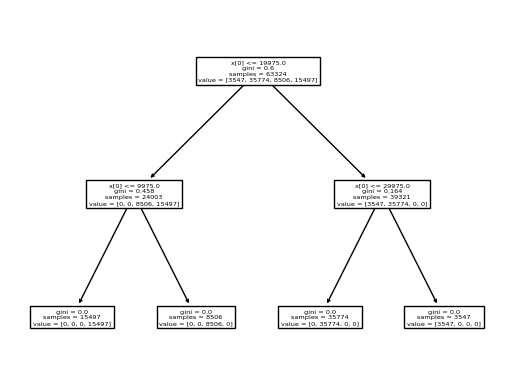

In [92]:
# Entrena Modelos con la data de Train
lrc.fit(X_train, y_train)
svc.fit(X_train, y_train)
dtc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

# Plot Árbol de Decisión
plot_tree(dtc)

In [93]:
!pip install -q gradio
import gradio as gr
import requests

In [94]:
def choosenTeam(
            TeamStartingEquipmentValue: float,
            ):
    team_dict = {3: 'Nivel bajo', 2: 'Nivel medio', 1: 'Nivel Alto', 0: 'Nivel maximo'}
    prediction = svc.predict([[TeamStartingEquipmentValue]])[0] #Acá coloco el mejor modelo
    return team_dict[prediction]

team_interface = gr.Interface(fn=choosenTeam,
                              inputs=['number'],
                              outputs='text',
                              title='Predictor de Nivel de Equipo',
                              description='Ingresa un valor de TeamStartingEquipmentValue y predeciremos tu nivel de equipo').launch(debug=True,share=True)

team_interface.launch()

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://bc29572a159a081be1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://bc29572a159a081be1.gradio.live


AttributeError: ignored

#Evaluation

In [ ]:
# Evaluando los modelos definidos previamente
models = [lrc, svc, dtc, rfc]
for model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model.__class__.__name__}')
    print(f'{accuracy=:.4f}')

LogisticRegression
accuracy=0.5627
SVC
accuracy=0.9983
DecisionTreeClassifier
accuracy=1.0000
RandomForestClassifier
accuracy=1.0000


De los cuatro modelos analizados  el elegido es SVC. Lo anterior debido a que, si bien ranto DecisionTree como RandomForest ofrecen un accuracy perfecto de 1.0, podría ser indicio de overfitting. Al mismo tiempo, LogisticRegression es el que peor indicador tiene. Por el contrario, SVC ofrece un accuracy de 0.99, muy buen indicador para efectos de predicción y ligeramente menos propenso a overfitting.

#Deployment

In [ ]:
#Exportación del modelo predictivo a un archivo local
import pickle
with open('modeloCounterStrike.pkl', 'wb') as archivo:
    pickle.dump(svc, archivo)

In [ ]:
#Importando el modelo exportado

from joblib import load
import warnings

# Ignorando los Warnings
warnings.filterwarnings("ignore", category=UserWarning)

def predecir(TeamStartingEquipmentValue):

    input_data = (TeamStartingEquipmentValue)

    # cambiando input_data a array numpy
    input_data_as_numpy_array = np.asarray(input_data)

    # reformateando el array
    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

    # Cargar el modelo desde el archivo
    with open('modeloCounterStrike.pkl', 'rb') as archivo:
      modelo_cargado = pickle.load(archivo)

    #Realizando la predicción
    prediction = modelo_cargado.predict(input_data_reshaped)

    return int(prediction[0])

valor_prediccion= 35000
prediccion = predecir(valor_prediccion)


if(prediccion==3):
   print("La predicción es ", valor_prediccion, "es decir tu nivel de equipo es Bajo")
elif(prediccion==2):
   print("La predicción es ", valor_prediccion, "es decir tu nivel de equipo es Medio")
elif(prediccion==1):
   print("La predicción es ", valor_prediccion, "es decir tu nivel de equipo es Alto")
elif(prediccion==0):
   print("La predicción es ", valor_prediccion, "es decir tu nivel de equipo es maximo ")

La predicción es  35000 es decir tu nivel de equipo es maximo 
